In [ ]:
#Creating dataframe
import pandas as pd
df= pd.read_csv('/content/tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [ ]:
df.shape

(40000, 3)

In [ ]:
df.size

120000

In [ ]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

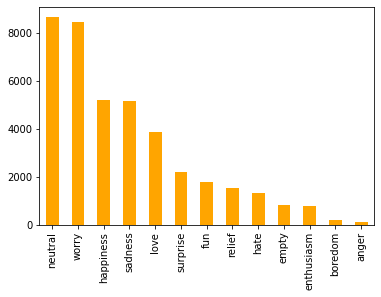

In [ ]:
#Data Visualisation
df['sentiment'].value_counts().plot(kind='bar', color='orange')

In [ ]:
#Dividing data into input and output
x = df.iloc[:,1]
y = df.iloc[:,0]
print(x)
print(y)

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object
0        1956967341
1        1956967666
2        1956967696
3        1956967789
4        1956968416
            ...    
39995    1753918954
39996    1753919001
39997    1753919005
39998    1753919043
39999    1753919049
Name: tweet_id, Length: 40000, dtype: int64


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
#Applying TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
xtr_v = vec.fit_transform(x_train)
xts_v = vec.transform(x_test)

In [ ]:
xtr_v

<30000x13 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in Compressed Sparse Row format>

In [ ]:
#Applying Classifier
from sklearn.svm import SVC
model=SVC()

In [ ]:
#Model fitting
model.fit(xtr_v,y_train)

In [ ]:
#Predicting the Output
y_pred = model.predict(xts_v)
y_pred  
#Predicted values

In [ ]:
y_test #Actual values

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

In [ ]:
a= df['content'][14]
a

In [ ]:
a= vec.transform([a])
model.predict(a)

In [ ]:
#Pipelining
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

In [ ]:
#Predictor variable
y_pred1 = text_model.predict(x_test)
y_pred1

In [ ]:
#Accuracy of pipelined model
accuracy_score(y_pred1,y_test)*100

In [ ]:
#Individual prediction
a1= df['content'][14050]
a1

In [ ]:
a1= vec.transform([a1])
model.predict(a1)

In [ ]:
#JOBLIB
import joblib
joblib.dump(text_model,'tweet_emotions')

In [1]:
#Temporary deployment

In [2]:
!pip install streamlit --quiet

     |████████████████████████████████| 9.2 MB 9.9 MB/s 
     |████████████████████████████████| 4.7 MB 44.4 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 235 kB 69.2 MB/s 
     |████████████████████████████████| 164 kB 57.6 MB/s 
     |████████████████████████████████| 181 kB 56.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 


In [3]:
%%writefile app.py 
#%%writefile is amagic command to create app.py file
import streamlit as st
import joblib
model = joblib.load('tweet_emotions')
st.title('TEXT EMOTIONS CLASSIFIER')  #creates a title in web app
ip = st.text_input('Enter the text')  #creates a text box in web app
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0]) # st.button will create a button with name Predict
  #st.title(op[0]) # the output will be displayed as a title

Writing app.py


In [4]:
!streamlit run app.py & npx localtunnel --port 8501

2022-09-24 07:02:26.065 INFO    numexpr.utils: NumExpr defaulting to 2 threads.



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.200.94:8501

npx: installed 22 in 4.213s
your url is: https://light-numbers-grin-34-125-200-94.loca.lt
  Stopping...
^C
